In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

## Data Profiling
Data profiling is a process of reviewing the source data, understanding structure, and content interrelationships, and identifying potential for data projects.

In [ ]:
# import dataset
df = pd.read_csv('shampoo_sales.csv')

In [ ]:
# display top 5 rows
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [ ]:
# display bottom 5 rows
df.tail()

,Month,Sales
31,3-08,407.6
32,3-09,682.0
33,3-10,475.3
34,3-11,581.3
35,3-12,646.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


## Data Cleaning
Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

In [ ]:
# set the data range with monthly seasonal
date = pd.date_range(start='1/1/2001', end='12/31/2003', freq='M')

date

DatetimeIndex(['2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30',
               '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31',
               '2001-09-30', '2001-10-31', '2001-11-30', '2001-12-31',
               '2002-01-31', '2002-02-28', '2002-03-31', '2002-04-30',
               '2002-05-31', '2002-06-30', '2002-07-31', '2002-08-31',
               '2002-09-30', '2002-10-31', '2002-11-30', '2002-12-31',
               '2003-01-31', '2003-02-28', '2003-03-31', '2003-04-30',
               '2003-05-31', '2003-06-30', '2003-07-31', '2003-08-31',
               '2003-09-30', '2003-10-31', '2003-11-30', '2003-12-31'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
# create new column
df['Time Series'] = pd.DataFrame(date, columns=['Date'])

df.head()

,Month,Sales,Time Series
0,1-01,266.0,2001-01-31
1,1-02,145.9,2001-02-28
2,1-03,183.1,2001-03-31
3,1-04,119.3,2001-04-30
4,1-05,180.3,2001-05-31


In [ ]:
# drop month column
df.drop(['Month'], axis=1, inplace=True)

In [ ]:
df.head()

,Sales,Time Series
0,266.0,2001-01-31
1,145.9,2001-02-28
2,183.1,2001-03-31
3,119.3,2001-04-30
4,180.3,2001-05-31


In [ ]:
# check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Sales        36 non-null     float64       
 1   Time Series  36 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 704.0 bytes


In [ ]:
# rename column name
df.columns = ['y', 'ds']

df.head()

,y,ds
0,266.0,2001-01-31
1,145.9,2001-02-28
2,183.1,2001-03-31
3,119.3,2001-04-30
4,180.3,2001-05-31


## Exploratory Data Analysis
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

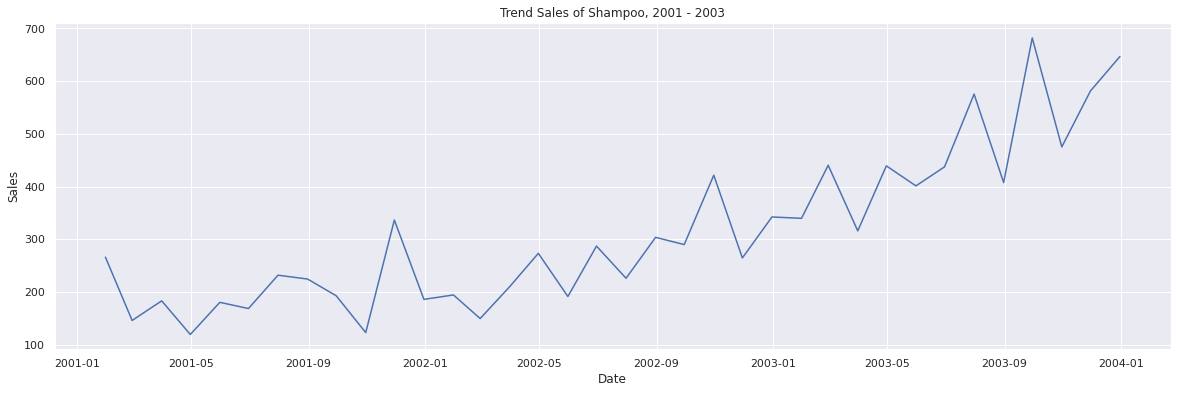

In [ ]:
sns.set(rc={"figure.figsize":(20, 6)})
df_eda = sns.lineplot(data=df, x='ds', y='y')
df_eda.set(xlabel = 'Date', ylabel = 'Sales', title = 'Trend Sales of Shampoo, 2001 - 2003');